In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
ensaios = np.array([[-1, -1], [1, -1], [-1, 1], [1,1]])

In [4]:
import pyDOE2 as doe

In [5]:
ensaios = doe.ff2n(2)

In [6]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

In [34]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha', 'Chocolate'])

In [35]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


In [36]:
experimento['Porcoes'] = [19,37,24,49]

In [37]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


In [11]:
import seaborn as sns

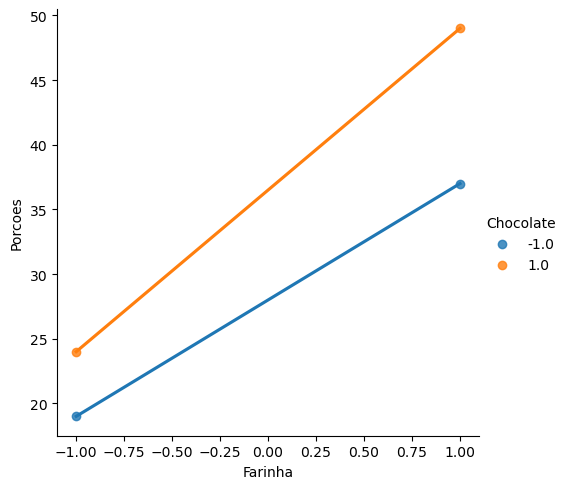

In [12]:
ax = sns.lmplot(data = experimento, x = 'Farinha', y = 'Porcoes', ci = None,hue = 'Chocolate')

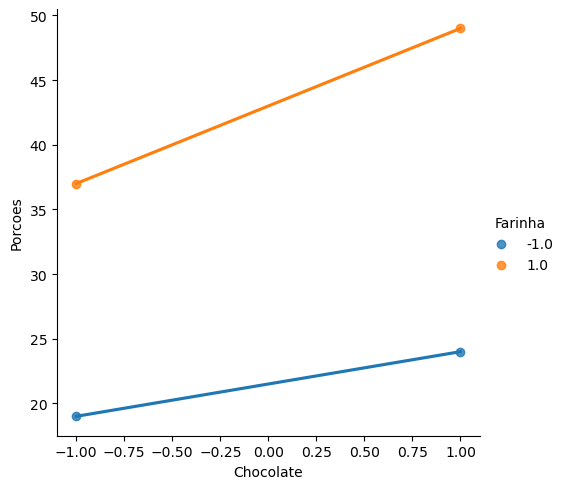

In [13]:
ax = sns.lmplot(data = experimento, x = 'Chocolate', y = 'Porcoes', ci = None, hue = 'Farinha')

A partir dessa análise, nós temos duas grandes hipóteses através da comparação entre esses gráficos. A primeira, que há provavelmente um efeito de interação entre a farinha e o chocolate e segundo, que a farinha, ela possui maior influência na quantidade de cupcakes produzidos.

Como que nós damos embasamento à essa comprovação usando a estatística? Uma possibilidade é nós descrevermos o nosso experimento matematicamente

# Modelo estatístico

P -> X farinha + X chocolate + Xfarinha . XChocolate

P = B0 + B1.Xfarinha + B2.XChocolate + B3.Xfarinha.XChocolate + erro 

B0 = Intercepto

B1.Xfarinha e B2.XChocolate = efeitos isolados

B3.Xfarinha.XChocolate = Efeito interação

Erro = incapacidade do modelo de representar os dados experimentais

In [14]:
import statsmodels.api as sm

In [15]:
import statsmodels.formula.api as smf

In [16]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [17]:
modelo_ajustado = modelo.fit()

In [21]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Jun 2024   Prob (F-statistic):                nan
Time:                        09:06:28   Log-Likelihood:                 126.02
No. Observations:                   4   AIC:                            -244.0
Df Residuals:                       0   BIC:                            -246.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        in

E:\Anaconda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Podemos analisar que a Farinha é o efeito que possui mais influencia na quantatidade de cupcakes produzidos com B1 = 10.75

Precisamos aumentar o numero de graus de liberdade do nosso experimento para que seja possível aplicar testes de hipótese. Observe que em P não temos nenhum valor inteiro e não possuimos valores no intervalo de confiança

In [23]:
centro = np.array([[0,0,29], [0,0,30],[0,0,29], [0,0,30]])

In [26]:
centro_dataframe = pd.DataFrame(centro, columns = ['Farinha', 'Chocolate', 'Porções'], index = [4,5,6,7])

In [33]:
centro_dataframe

,Farinha,Chocolate,Porções
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [40]:
experimento 

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


In [42]:
experimento.loc[len(experimento)] = [0,0,29]

In [43]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29


In [44]:
experimento.loc[len(experimento)] = [0,0,30]

In [45]:
experimento.loc[len(experimento)] = [0,0,29]

In [46]:
experimento.loc[len(experimento)] = [0,0,30]

In [47]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


Agora, depois que inserimos o novos experimentos com o intuito de aumentar os graus de liberdade, precisamos ajustar o modelo

In [48]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [50]:
modelo_ajustado = modelo.fit()

In [51]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Fri, 28 Jun 2024   Prob (F-statistic):            0.00152
Time:                        09:24:43   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

E:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Agora, como os graus de liberdade residuais do modelo vale 4, conseguimos aplicar o teste de significancia estatística (DF Residuals)

Para realizar os testes de significancia estatistica, vamos olhar o T e P>|T|

P|T| é calculado a partir de um teste de hipotese

Hipotese nula -> Bi = 0. Portanto os parametros nao sao estatisticamente significativo

Hipotese Alternativa -> Bi diferente 0. Portanto os parametros são estatisticamente significantes

Se P> |t| for <= 0.05 => Bi é estatisticamente significante. Hipotese nula foi descartada

SE P> |t| > 0.05 => Bi não é estatisticamente significante. Hipótese nula não foi descartada

Apos essas definições, podemos concluir que:

Para o intercepto H0 é descartado e ele é estatisticamente significante

Para a Farinha HO é descartado e ela é estatisticamente significante

Para o Chocolate HO é descartado e ele é estatisticamente significante

Para Farinha:Chocolate H0 não é descartado e ele não é estatisticamente significante

Como Farinha:Chocolate não é estatisticamente significante, ele não influencia na quantidade de porções do modelo e podemos retirá-lo de tal

# Modelo estatistico atualizado

P = B0 + B1.Xfarinha + B2.Xchocolate + erro

In [52]:
modelo_2 = smf.ols(data = experimento , formula = 'Porcoes ~ Farinha + Chocolate')

In [53]:
modelo_2_ajustado = modelo_2.fit()

In [54]:
print(modelo_2_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           0.000571
Time:                        09:54:02   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

E:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [55]:
observados = experimento['Porcoes']

In [56]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

In [58]:
preditos = modelo_2_ajustado.predict()

In [59]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

In [60]:
import matplotlib.pyplot as plt

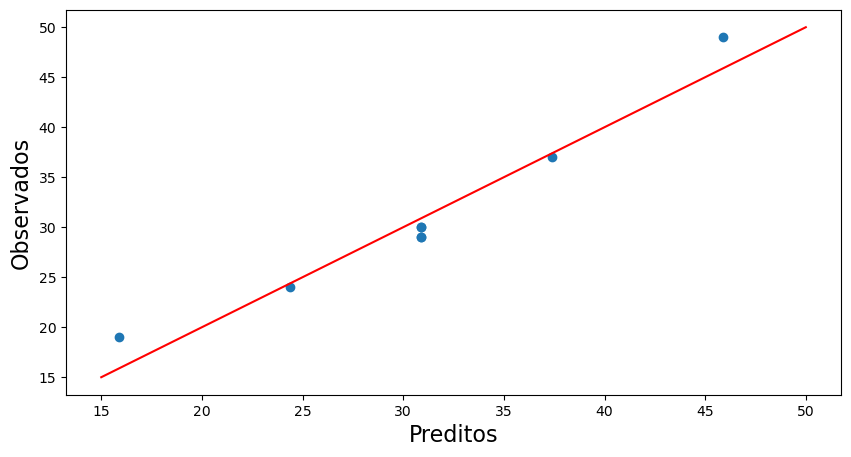

In [62]:
plt.figure(figsize = (10,5))
plt.xlabel('Preditos', fontsize = 16)
plt.ylabel('Observados', fontsize = 16)
x = np.linspace(start = 15, stop = 50, num = 10)
y = np.linspace(start = 15, stop = 50, num = 10)
plt.plot(x,y, 'r')
plt.scatter(preditos, observados)